In [4]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [5]:
all_AVA_muts = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

5676

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'PhoP': ['ECK125162...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantly associ...",{'translation': ['rplKAJL-rpoBC']},"[{'name': '2.7.7.6'

In [6]:
combo_assoc_mat = pd.DataFrame()

signif_logodds_assoc_mat_files = [
    "../data/assocs/geno_signif_logodds_assoc_mat.pkl",
    "../data/assocs/ops_signif_logodds_assoc_mat.pkl",
    "../data/assocs/pathway_signif_logodds_assoc_mat.pkl",
    "../data/assocs/regs_signif_logodds_assoc_mat.pkl",
]
for f in signif_logodds_assoc_mat_files:
    signif_logodds_assoc_mat = pd.read_pickle(f)
        
    feat_type = ''
    if "ops_" in f:
        feat_type += " operon"
    if "pathway_" in f:
        feat_type += " pathway"
    if "regs_" in f:
        feat_type += " regulon"

    signif_logodds_assoc_mat.index = signif_logodds_assoc_mat.index + feat_type
    combo_assoc_mat = combo_assoc_mat.append(signif_logodds_assoc_mat)

combo_assoc_mat = combo_assoc_mat.fillna(0)
combo_assoc_mat

,42 celsius,glutaric acid,ΔtpiA glucose M9 pre-evolved,30 celsius,CaCl2(0.1),FeSO4(20uM) sodium citrate(10mM),GMOS,H. sapien pgi,H. sapien tpiA,KH2PO4(3) Na2HPO4(6.8),M9,MgSO4(0.24),NH4Cl(1),NaCl(0.5g/L) trace elements,U-13C glucose(2),V. cholerae pgi,V. cholerae tpiA,WT,adipic acid,chloramphenicol,glucose(4),glucose(4) or acetate(4),glucose(4) or glycerol(2.5),n-butanol,xylose(4),(NH4)2SO4(1),(NH4)2SO4(1) MgSO4,K2HPO4(5.3) KH2PO4(2),glucose(1),thiaminne hydrochloride(0.3µM) Ga(NO3)3(100mg/L),2 3-butanediol,B. melitensis pgi,hexanoic acid,octanoic acid,putrescine,CaCl2(0.1mM),KH2PO4(3) Na2HPO4(6.78),M63,MS57,MgSO4(1mM),glucose(2),hexamethylenediamine,Δpgi,m-tartrate,coumaric acid,JCL260,LB,glucose(3),isobutanol(8g/L),(NH4)2SO4(2),(NH4)2SO4(2) MgSO4(0.12),C6H5FeO7(0.00049) casamino(5) WT P. aeruginosa toxins,C6H5FeO7(0.00049) casamino(5) pvdJ KO P. aeruginosa toxins,KH2PO4(13.6),none,P. aerophilum pgi,isobutyric acid,gentamycin(0.03),doxycycline,C13H10N2O(0.168184),D-arabinose,acetate(4),glycerol(2.5),bla-TEM-1,ceftazidime,pBGT,ΔtpiA,Δgnd glucose M9 pre-evolved,glucose(4) or xylose(4),PQ(0.8mM),glucose-evolved BOP1000,D-lyxose,monomethyl succinate,E. coli K-12 MG1655 pCA24N-fucO,chloramphenicol(25),ethylene glycol(30mM),trimethoprim,ΔptsHI-crr glucose M9 pre-evolved,propanediol,ΔsdhCDAB glucose M9 pre-evolved,Δpgi glucose M9 pre-evolved,glycine(2mM) L-Serine(varying) Wolfe's vitamin solution trace elements(X1),ΔsdaA ΔsdaB ΔtdcG ΔglyA,P. aerophilum tpiA,D-2-deoxyribose,37 celsius
nagA,2.104599,3.281931,3.578640,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
rph-pyrE attenuator terminator,0.909711,0.000000,0.000000,0.702051,0.450423,2.635417,2.229193,1.75972,1.739408,0.438517,0.450423,0.438517,0.234044,0.209537,2.590136,1.992760,2.764694,0.411158,1.456977,1.984252,0.571011,1.957955,2.720231,1.68274,1.781413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
rph,1.570840,0.000000,0.000000,1.265897,0.455231,3.293030,2.886110,0.00000,2.159710,0.427710,0.455231,0.427710,0.000000,0.283683,2.150586,0.000000,0.000000,0.438392,0.000000,2.398030,0.862028,0.000000,2.335945,0.00000,2.439725,2.226713,2.226713,2.226713,2.226713,2.226713,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
rpoC,0.000000,1.626873,0.000000,0.000000,0.429790,0.000000,0.000000,0.00000,1.205938,0.435266,0.429790,0.435266,0.249900,0.000000,0.000000,2.427023,0.000000,0.451266,0.000000,0.000000,0.000000,1.883853,0.000000,0.00000,1.906578,0.000000,0.000000,0.000000,0.000000,0.000000,1.723537,1.717227,1.826492,2.281434,1.358559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
hfq,2.629555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.72622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.808490,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [7]:
design_feats = [
    "CRP regulon",
    "glpFKX operon",
    "glpK",
    "cyaA operon",
    "cyaA",
    "ptsHI-crr operon",
    "crr",
]
design_assoc_mat = combo_assoc_mat.copy()
design_assoc_mat = design_assoc_mat[design_assoc_mat.index.isin(design_feats)]
design_assoc_mat = design_assoc_mat.loc[:, (design_assoc_mat != 0).any(axis=0)]
design_assoc_mat

,30 celsius,CaCl2(0.1),KH2PO4(3) Na2HPO4(6.8),M9,MgSO4(0.24),NaCl(0.5g/L) trace elements,WT,glucose(4) or glycerol(2.5),Δpgi,JCL260,LB,isobutanol(8g/L),D-arabinose,glycerol(2.5),ceftazidime,pBGT,ΔptsHI-crr glucose M9 pre-evolved
cyaA,2.896955,0.452960,0.458389,0.452960,0.458389,0.614848,0.461784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.778547,0.000000,0.000000,3.344748
glpK,3.159544,0.453079,0.458510,0.453079,0.458510,0.615022,0.790677,3.528355,0.000000,0.000000,0.000000,0.000000,0.000000,4.157967,0.000000,0.000000,0.000000
crr,2.783092,0.000000,0.000000,0.000000,0.000000,0.613542,0.000000,0.000000,3.441309,0.000000,0.000000,0.000000,0.000000,3.624906,0.000000,0.000000,0.000000
ptsHI-crr operon,2.630941,0.464877,0.470097,0.464877,0.470097,0.627995,0.000000,0.000000,3.040549,0.000000,0.000000,0.000000,0.000000,3.462833,0.000000,0.000000,0.000000
cyaA operon,2.866355,0.465683,0.470914,0.465683,0.470914,0.559495,0.483157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.738579,0.000000,0.000000,3.361491
glpFKX operon,3.215829,0.465817,0.471050,0.465817,0.471050,0.629370,0.789696,3.419709,0.000000,0.000000,0.000000,0.000000,0.000000,4.214675,0.000000,0.000000,0.000000
CRP regulon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.869491,0.000000,0.247071,0.522107,0.247071,1.227659,1.088974,0.360233,0.748467,0.000000


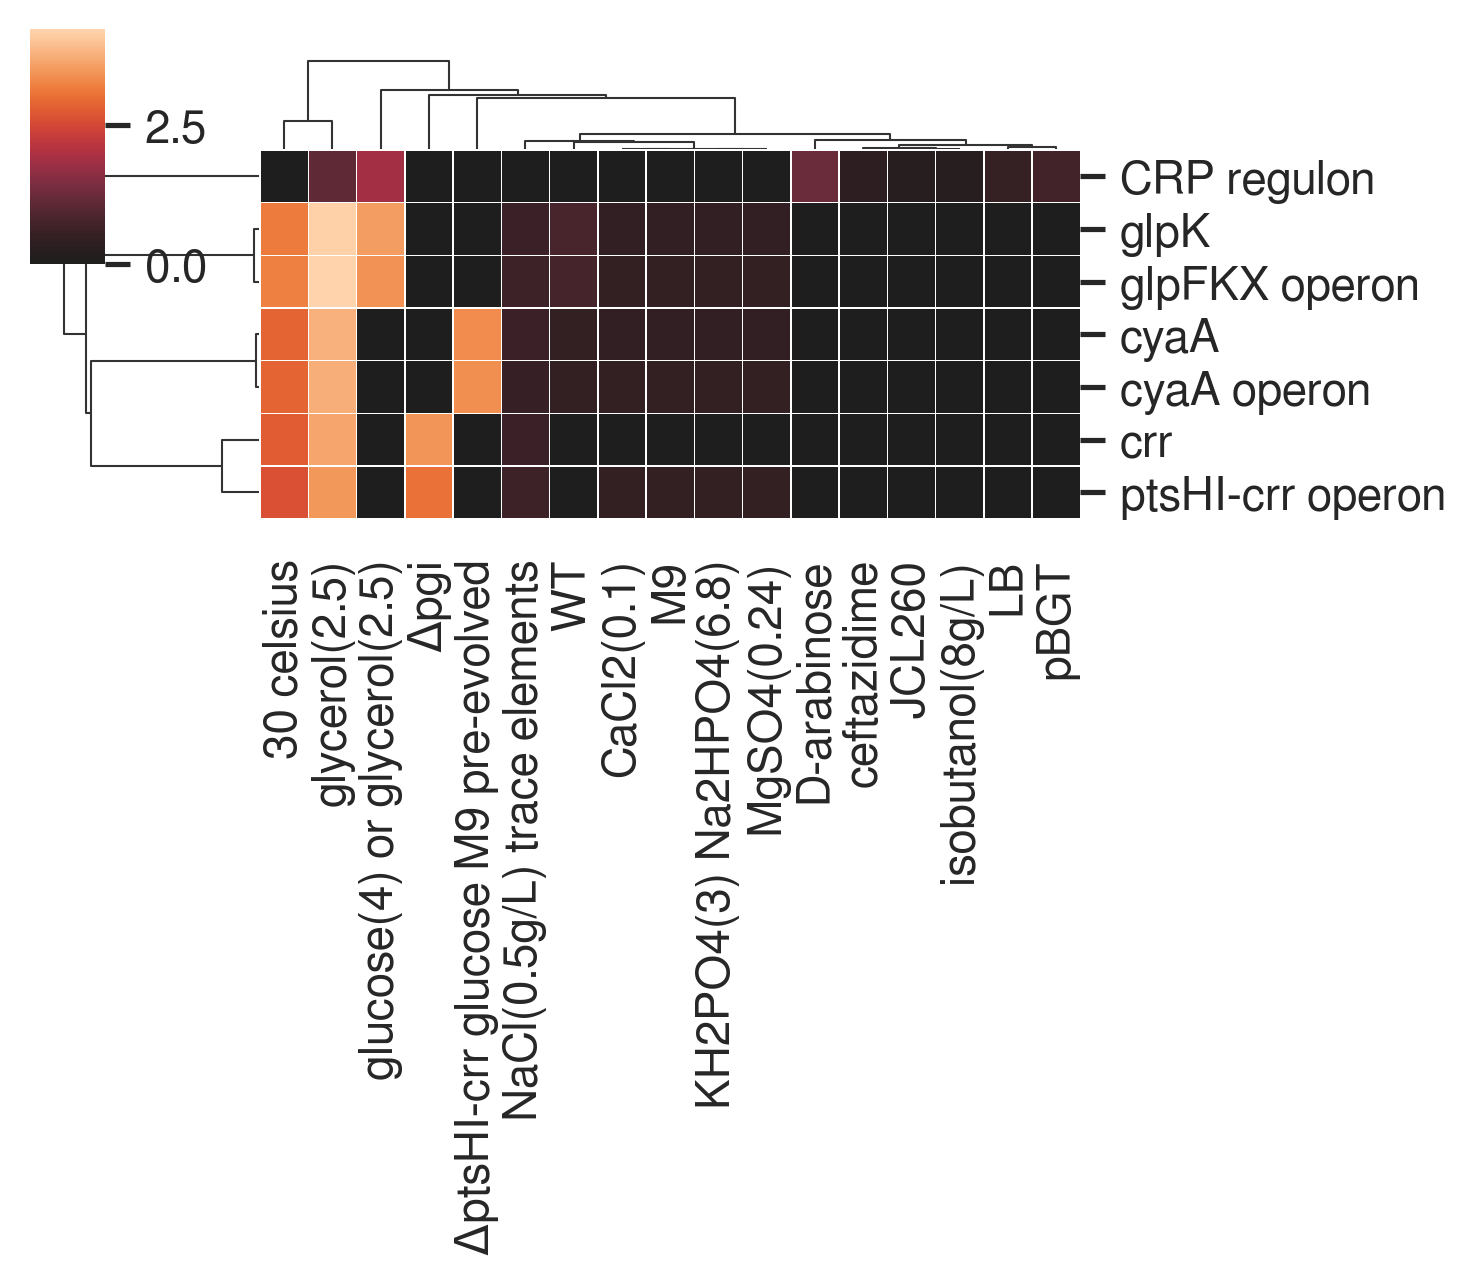

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("white")
sns.set(font="FreeSans")

df = design_assoc_mat.copy()
# df = df.rename({'cck_pts__gmos_delptsHIcrr': 'GMOS'}, axis='index')
# df = df.drop(columns=["unknown"])

cm = sns.clustermap(
    df,
    linewidths=0.1,
    figsize=(5, 4.35),
#     cmap="vlag",
#     cbar_kws={'label': 'i-modulon activity'},
#     cbar_pos=(0.05, 0.8, .02, .13),
    center=0,
    yticklabels=True,
    xticklabels=True
)
# Fix for recent matplotlib/seaborn issue
cm.ax_heatmap.set_ylim(len(df)+0, -0)
plt.savefig("../figs/tmp.svg", format="svg")